# Joining partitioned ROMS files
In addition to requiring partitioned input files, ROMS produces partitioned output files, which need to be joined to be analyzed.
We can join these files using the `join_netcdf` function.

## Writing some partitioned example files
As in the page in [partitioning](https://roms-tools.readthedocs.io/en/latest/partition.html), we will create and partition some example files to demonstrate the use of the joining tool:

In [1]:
from roms_tools import Grid

In [2]:
grid = Grid(
    nx=300,
    ny=150,
    size_x=23000,
    size_y=12000,
    center_lon=-161.0,
    center_lat=14.4,
    rot=-3.0,
)

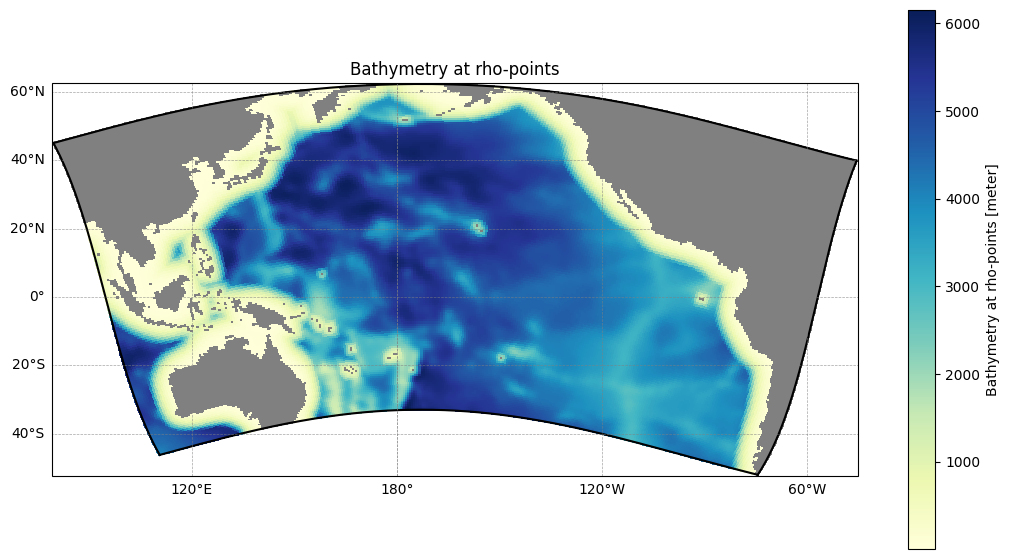

In [3]:
grid.plot()

In [4]:
filepath_grid="my_roms_grid.nc"
grid.save(filepath_grid)

2025-11-21 13:36:49 - INFO - Writing the following NetCDF files:
my_roms_grid.nc


[PosixPath('my_roms_grid.nc')]

In [5]:
from roms_tools import partition_netcdf
partition_netcdf(filepath_grid, np_xi=5, np_eta=3, output_dir="to_join/")

[PosixPath('to_join/my_roms_grid.00.nc'),
 PosixPath('to_join/my_roms_grid.01.nc'),
 PosixPath('to_join/my_roms_grid.02.nc'),
 PosixPath('to_join/my_roms_grid.03.nc'),
 PosixPath('to_join/my_roms_grid.04.nc'),
 PosixPath('to_join/my_roms_grid.05.nc'),
 PosixPath('to_join/my_roms_grid.06.nc'),
 PosixPath('to_join/my_roms_grid.07.nc'),
 PosixPath('to_join/my_roms_grid.08.nc'),
 PosixPath('to_join/my_roms_grid.09.nc'),
 PosixPath('to_join/my_roms_grid.10.nc'),
 PosixPath('to_join/my_roms_grid.11.nc'),
 PosixPath('to_join/my_roms_grid.12.nc'),
 PosixPath('to_join/my_roms_grid.13.nc'),
 PosixPath('to_join/my_roms_grid.14.nc')]

## Joining the example files
Each of these files has a subset of the original grid in it. To reassemble them into a coherent whole, we use the `join_netcdf` tool. The tool takes a wildcard pattern or list of files, and infers the original layout. We can also provide an optional `output_path`, or `ROMS-Tools` will take the common root filename by default:

In [6]:
from roms_tools import join_netcdf

In [7]:
%%time
joined_grid_path = join_netcdf("to_join/my_roms_grid.??.nc")

Saved joined dataset to: to_join/my_roms_grid.nc
CPU times: user 353 ms, sys: 96.5 ms, total: 449 ms
Wall time: 1.32 s


Comparing with the original grid, we can see the partitions have joined correctly:

In [8]:
joined_grid = Grid.from_file("to_join/my_roms_grid.nc")

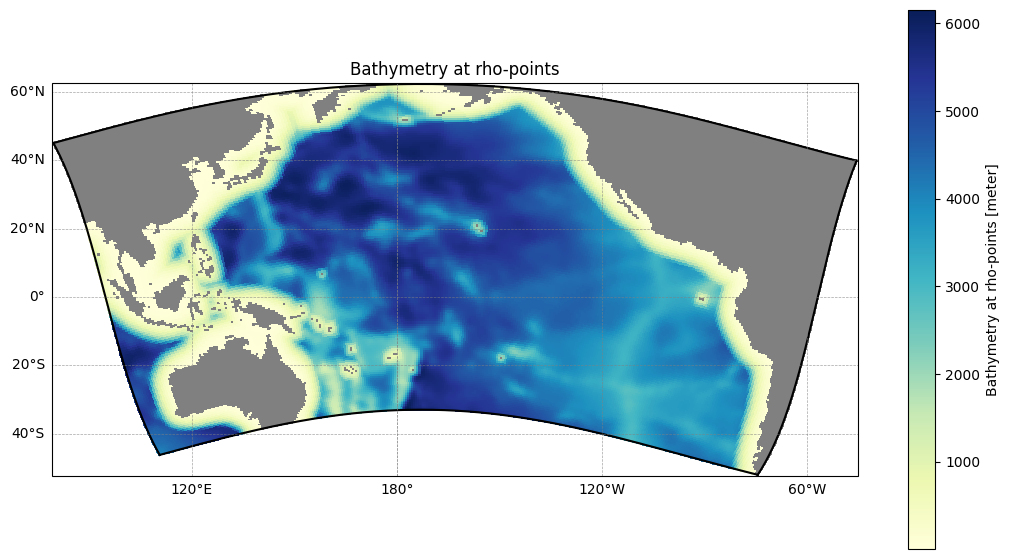

In [9]:
joined_grid.plot()